# PCA 範例

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [1]:
#!pip3 install --user sklearn
#!pip3 install --user --upgrade matplotlib

載入套件

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)
%matplotlib inline

載入 iris 資料集

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print("Target: ", iris.target_names)
print("Features: ", iris.feature_names)

Target:  ['setosa' 'versicolor' 'virginica']
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


設定 模型 估計參數

In [4]:
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)

資料建模 並 視覺化 結果

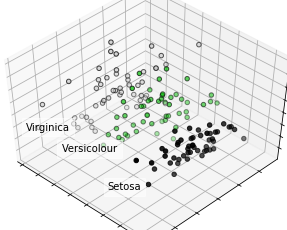

In [5]:
pca.fit(X)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
#清除目前圖片
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#清除目前座標
plt.cla()


for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')
ax.dist = 8
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [6]:
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

載入 相關套件 並 執行 PCA 實驗 ...

In [7]:
print("Shape: ", X.shape)
print("Target: ", set(digits.target))
digits.target_names

Shape:  (537, 64)
Target:  {0, 1, 2}


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca.fit(X)
pca_X = pca.transform(X)

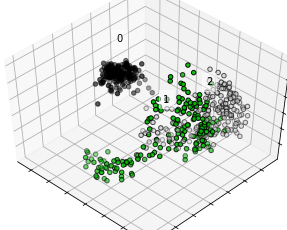

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

#圖片數量 ,(大小)
fig = plt.figure(1, (4,3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
plt.cla()


for num in list(set(digits.target)):
    ax.text3D(pca_X[y==num, 0].mean(), pca_X[y==num, 1].mean(), pca_X[y==num, 2].mean()+20, num, 
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
ax.scatter(pca_X[:, 0], pca_X[:, 1], pca_X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
       edgecolor='k')
ax.dist = 8
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()